In [1]:
import numpy as np
import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name=validation_set.class_names
print(class_name)

Found 17569 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [5]:
# Loading Model
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

pip install opencv-python

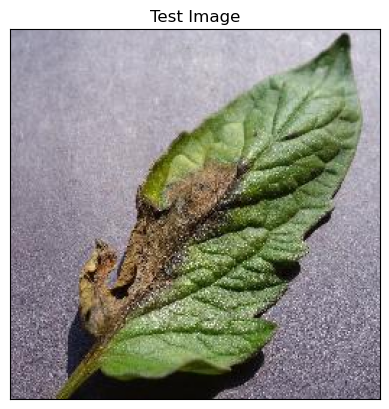

In [37]:
#Test Image Visualization 

import cv2
image_path = 'valid/Tomato___Late_blight/03f008be-5b97-4827-a2e2-88136b3c8714___RS_Late.B 6290.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [39]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [41]:
print(predictions)

[[5.6608718e-07 1.2445565e-10 3.3269426e-10 9.0375538e-09 1.6211268e-12
  3.1303461e-08 2.4181950e-13 4.2903459e-08 1.4564445e-10 2.2499568e-08
  3.4203981e-12 1.2203059e-13 1.4147666e-10 1.1556016e-11 3.2525991e-12
  3.1687061e-13 4.2319721e-09 1.8785459e-13 8.9424440e-12 1.9578109e-12
  2.2713066e-06 1.4048597e-07 9.9933195e-10 1.3630294e-11 8.2755726e-11
  1.9885012e-05 5.7651348e-05 3.1288371e-11 7.5236935e-11 1.7497489e-09
  9.9669051e-01 1.4122612e-07 3.5441071e-06 3.5424205e-12 3.8093606e-08
  2.7405784e-12 4.0660708e-12 3.2249787e-03]]


In [43]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

30


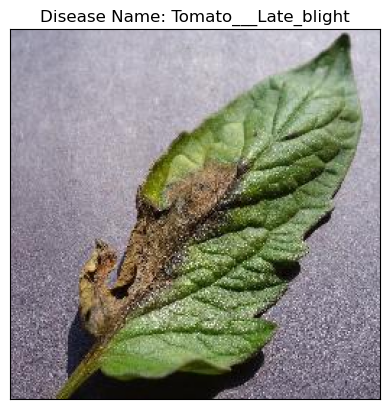

In [45]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()